# Plot results of multiwavelet spike detection

In [9]:
%load_ext autoreload
import scipy.io as sio 
import os
import numpy as np
import sys
sys.path.append("/home/timsit/mecp2/python/")
import mea_util
import detect_spikes as dspikes

# plotting 
import matplotlib.pyplot as plt
from venn import venn
import matplotlib as mpl

import sciplotlib.polish as splpolish 
import sciplotlib.style as splstyle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load results

In [10]:
data_folder = '/home/timsit/mecp2/Matlab_Analysis/analysis_functions_ts/spikeDetection'
file_name = 'multi_wavelet_single_channel'
spike_struct = mea_util.loadmat(os.path.join(data_folder, file_name))['spike_struct']

## Plot the intersection matrix to double check

In [3]:
%autoreload
intersection_matrix, unique_spike_times = dspikes.find_intersect_spikes(
spike_struct, fs=25000, round_decimal_places=3
)

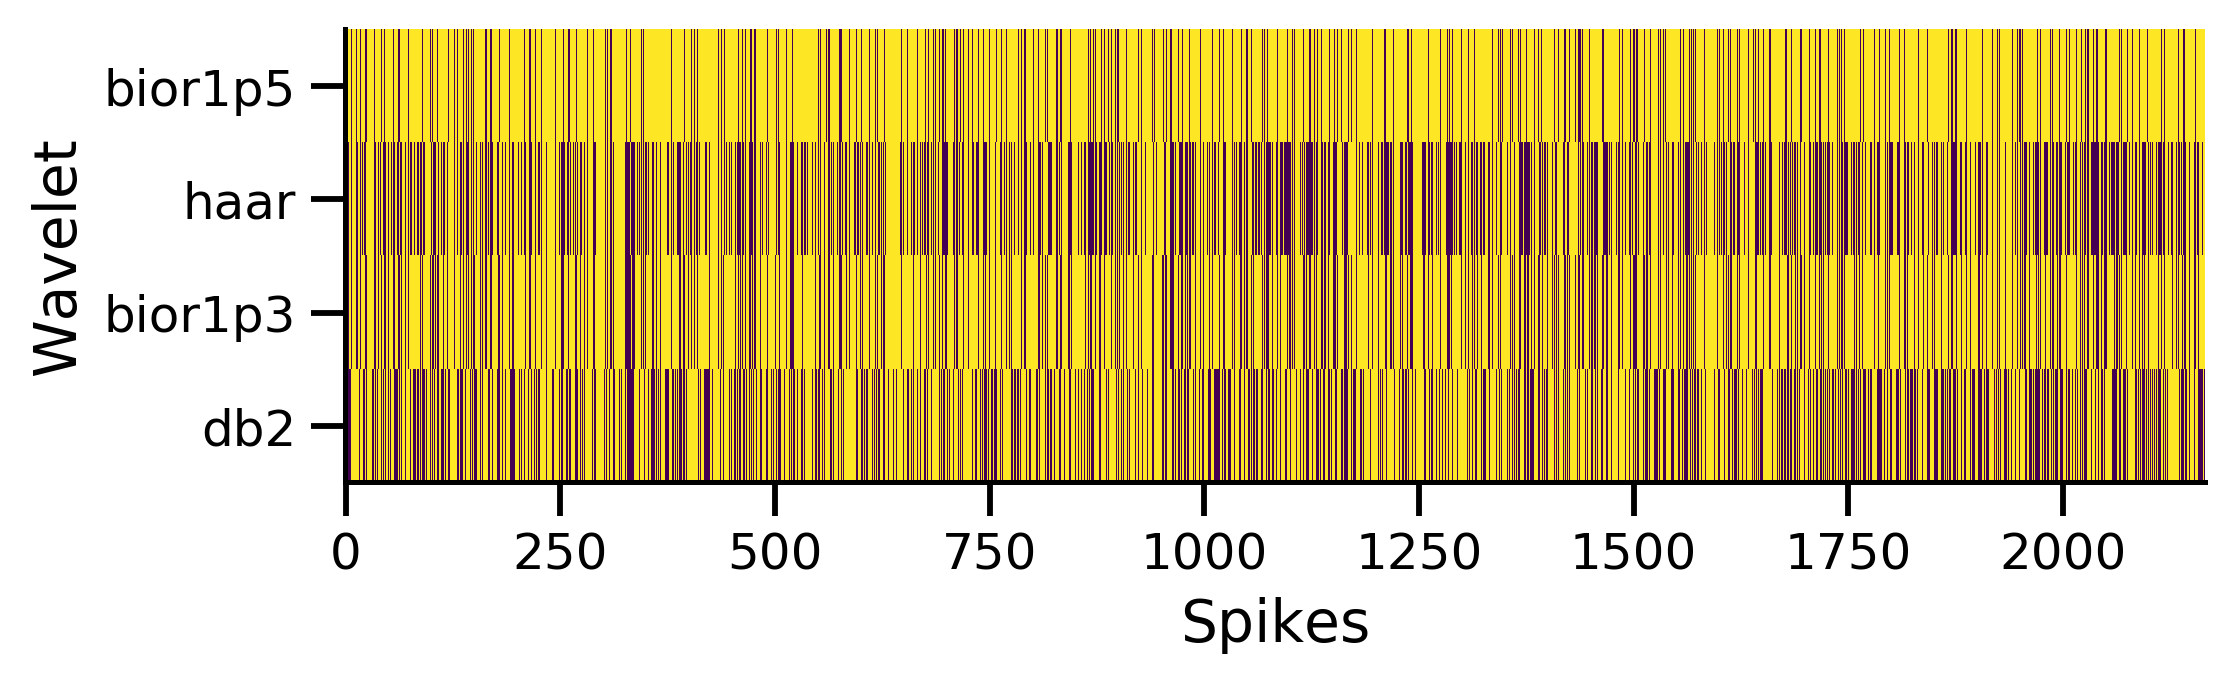

In [4]:
with plt.style.context(splstyle.get_style('nature-reviews')): 
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 2)
    ax.imshow(intersection_matrix.T, aspect='auto')
    ax.set_xlabel('Spikes')
    ax.set_ylabel('Wavelet')
    ax.set_yticks(np.arange(len(spike_struct.keys())))
    ax.set_yticklabels(spike_struct.keys())

## Plot venn diagram to show overlap

In [6]:
spike_times_dict = {}
custom_wavelet_name_dict = {'bior1p5': 'bior1.5',
                           'haar': 'haar', 
                           'bior1p3': 'bior1.3', 
                           'db2': 'db2'}

for n_wavelet, wavelet_name in enumerate(spike_struct.keys()):
    spike_times_dict[
        custom_wavelet_name_dict[wavelet_name]] = set(np.where(
    intersection_matrix[:, n_wavelet])[0])
    

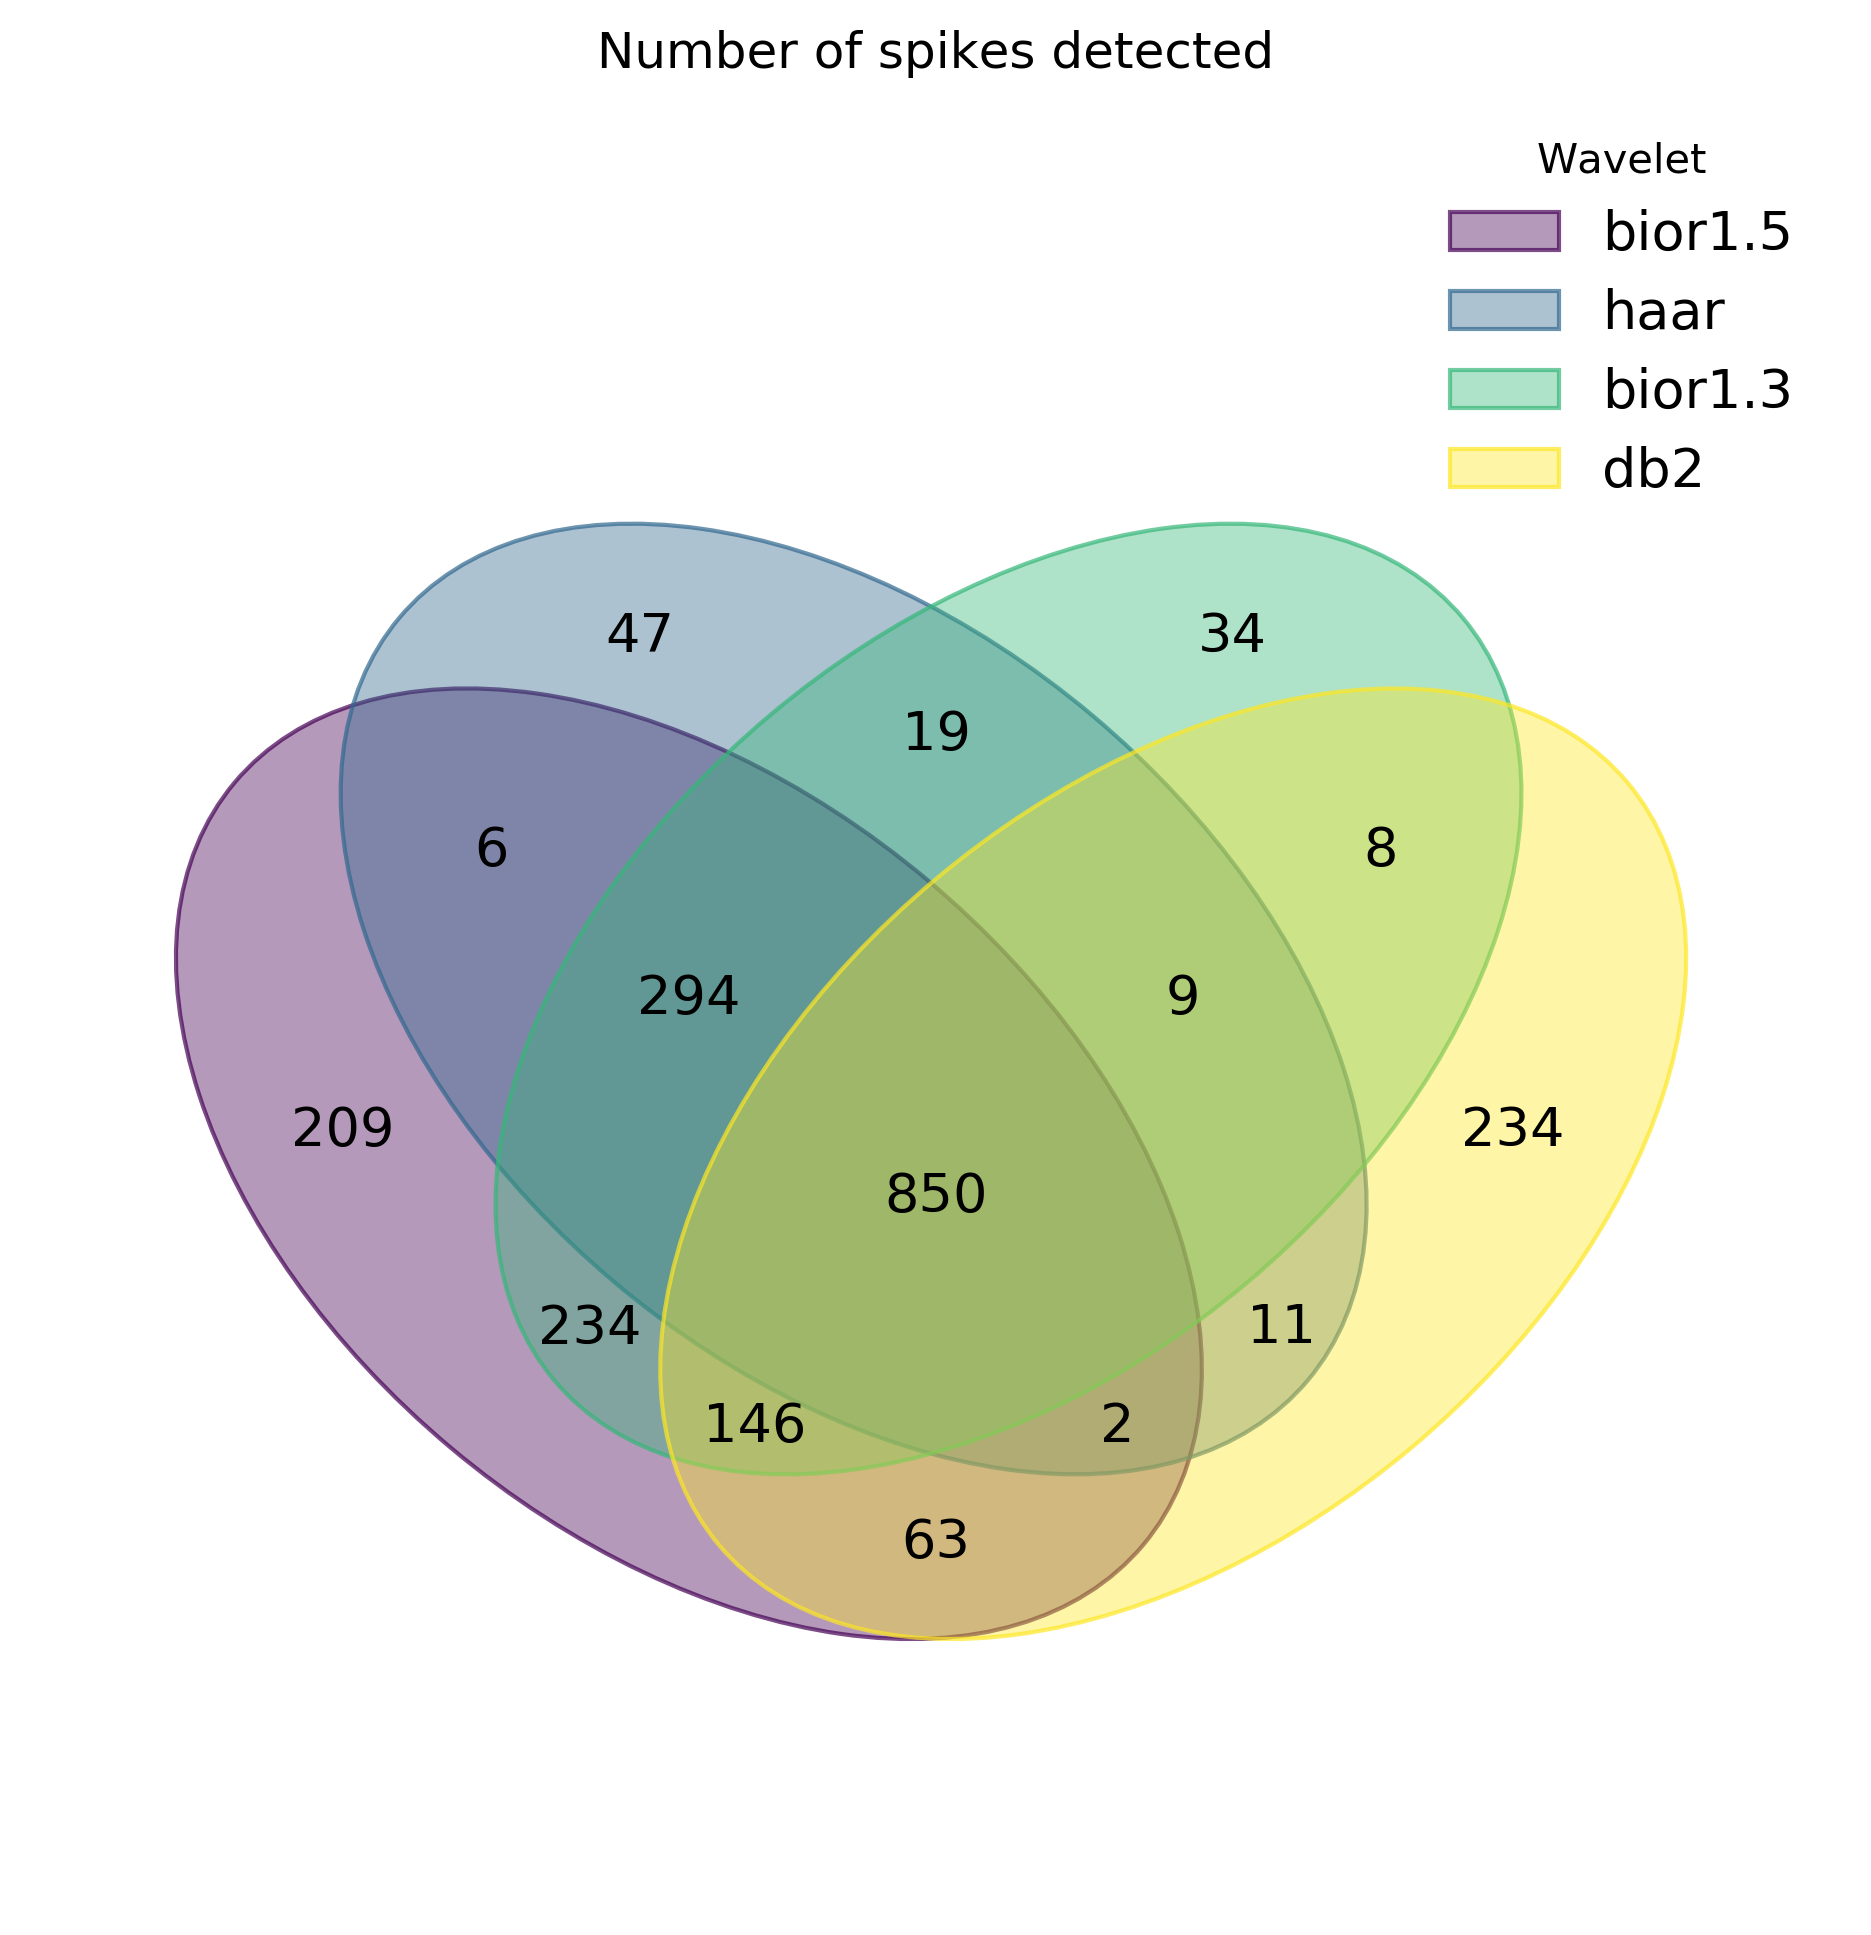

In [8]:
with plt.style.context(splstyle.get_style('nature-reviews')): 
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    ax = venn(spike_times_dict, ax=ax)
    legends = [c for c in ax.get_children() if isinstance(c, mpl.legend.Legend)]
    ax.set_title('Number of spikes detected', size=12)
    legends[0].set_title('Wavelet')
    # ax.legend(handles=legends, title='Wavelet')
    fig_folder = '/home/timsit/mecp2/figures/multiwavelet-detection/'
    fig_name = 'spikes_detected_venn_diagram'
    fig_ext = '.png'
    fig.savefig(os.path.join(fig_folder, fig_name + fig_ext), dpi=300,
               bbox_inches='tight')

## Plot detected spikes

In [11]:
spike_struct

{'bior1p5': [1625,
  2080,
  4533,
  6396,
  9806,
  13682,
  13762,
  14526,
  14982,
  18700,
  22166,
  23991,
  30868,
  30976,
  32225,
  32311,
  34102,
  34529,
  36220,
  36885,
  38233,
  39627,
  40203,
  40248,
  40441,
  40699,
  48878,
  49167,
  53864,
  54200,
  54359,
  54800,
  57648,
  57981,
  58837,
  61797,
  61936,
  63383,
  64136,
  64717,
  65964,
  67159,
  68580,
  70372,
  70796,
  77725,
  78212,
  79799,
  81441,
  82115,
  82238,
  82786,
  83561,
  87876,
  88152,
  89128,
  89417,
  90723,
  90943,
  94623,
  94768,
  95182,
  95450,
  95775,
  98252,
  99619,
  100539,
  104464,
  108749,
  110188,
  113492,
  115180,
  115413,
  116395,
  117180,
  118496,
  119684,
  120255,
  120676,
  120945,
  120983,
  121119,
  121607,
  123377,
  125028,
  126386,
  127524,
  130744,
  131856,
  132908,
  134082,
  136669,
  137061,
  139598,
  139963,
  140396,
  140739,
  142492,
  143915,
  144424,
  146754,
  152028,
  152862,
  155203,
  156365,
  157365,
